## Predicting Condominium Sale Prices

This is the first R project in part 7 of the Data quest R course. The purpose of this Guided Project is to explore the following questions:

How well does the size of a condominium (measured in gross square feet) explain or predict sale price across New York City as a whole?
To answer this, we'll explore property sales data for all five boroughs combined.
How well does the size of a condominium explain or predict sale price for each individual borough?
For this question, we'll build, analyze, and compare linear models for each borough.

Disclaimer: the data used here are the New York City Sales Data from November 1, 2018 to October 31, 2019. It was provided by the course at the beginning and can be found [here](https://data.world/dataquest/nyc-property-sales-data). I thought it was for the better to complete the project as intentended since ,as of July, 2020, gross_square_feet data is not being collected and/or recorded for the building class R4.

In [ ]:
library(readxl)
library(magrittr)
library(stringr)
library(dplyr)
library(readr)
library(ggplot2)
library(tidyr)
library(readr)
library(purrr)
library(broom)

In [ ]:
brooklyn <- read_excel("rollingsales_brooklyn.xlsx", skip = 4)
bronx <- read_excel("rollingsales_bronx.xlsx", skip = 4)
manhattan <- read_excel("rollingsales_manhattan.xlsx", skip = 4)
staten_island <- read_excel("rollingsales_statenisland.xlsx", skip = 4)
queens <- read_excel("rollingsales_queens.xlsx", skip = 4)
# REMOVE THIS CELLS

In [ ]:
# REMOVE THIS CELL
NYC_property_sales <- bind_rows(manhattan, bronx, brooklyn, queens, staten_island)

In [ ]:
# REMOVE THIS CELL
rm(brooklyn, bronx, manhattan, staten_island, queens)

In [ ]:
NYC_property_sales <- read_csv("NYC_property_sales.csv")

Rows: 38177 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (8): borough, neighborhood, building_class_category, tax_class_at_pres...
dbl  (11): block, lot, zip_code, residential_units, commercial_units, total_...
dttm  (1): sale_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Replace borough number with borough name, for clarity
NYC_property_sales <- NYC_property_sales %>%
  mutate(borough =
  case_when(borough == 1 ~ "Manhattan",
            borough == 2 ~ "Bronx",
            borough == 3 ~ "Brooklyn",
            borough == 4 ~ "Queens",
            borough == 5 ~ "Staten Island"))

In [ ]:
# Convert all colnames to lower case with no spaces (use underscores instead of spaces)
colnames(NYC_property_sales) %<>% str_replace_all("\\s", "_") %>% tolower()

In [ ]:
# Convert capitalized columns to Title Case
NYC_property_sales <- NYC_property_sales %>%
  mutate(neighborhood = str_to_title(neighborhood)) %>%
  mutate(building_class_category =
           str_to_title(building_class_category)) %>%
  mutate(address = str_to_title(address))

In [ ]:
# Select only distinct observations (drop duplicates)
NYC_property_sales <- NYC_property_sales %>%
  distinct()

In [ ]:
NYC_property_sales <- NYC_property_sales %>%
  # Filter out property exchanges between family members
  # We assume here that the threshold is $10,000 US DOllars
  filter(sale_price > 10000) %>%
  # Remove observations with gross square footage of zero
  # NOTE: We are only doing this here because we are analyzing condominium sales
  # If analyzing single family homes, we would also consider "land_square_feet"
  filter(gross_square_feet > 0) %>%
  # Drop na values in columns of interest
  drop_na(c(gross_square_feet, sale_price))

In [ ]:
NYC_property_sales <- NYC_property_sales %>%
  arrange(borough, neighborhood)

In [ ]:
# Code for aving the dataframe as a CSV file
write_csv(NYC_property_sales, "NYC_property_sales.csv")

In [ ]:
# single type of building class ("R4"), a condominium residential unit in a building with an elevator
NYC_condos <- NYC_property_sales %>%
  # Filter to include only property type: CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.
  # https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html
  filter(building_class_at_time_of_sale == "R4")

In [ ]:
NYC_property_sales

borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dttm>
NA,Airport La Guardia,01 One Family Dwellings,1,949,31,A5,1942 81st Street,NA,11370,1,0,1,1800,1224,1945,1,A5,775000,2019-04-05
NA,Airport La Guardia,01 One Family Dwellings,1,976,61,A5,21-21 80th Street,NA,11370,1,0,1,1800,1224,1950,1,A5,985000,2019-09-26
NA,Airport La Guardia,01 One Family Dwellings,1,976,68,A5,21-07 80 Street,NA,11370,1,0,1,1800,1224,1950,1,A5,822500,2018-11-21
NA,Airport La Guardia,02 Two Family Dwellings,1,949,60,B1,19-61 80th Street,NA,11370,2,0,2,2000,2400,1945,1,B1,990000,2019-05-01
NA,Airport La Guardia,02 Two Family Dwellings,1,976,28,B3,2146 81st Street,NA,11370,2,0,2,1800,1224,1950,1,B3,735000,2019-02-19
NA,Airport La Guardia,12 Condos - Walkup Apartments,2,949,1028,R2,"80-12 19th Avenue, 2",2,11370,0,0,0,0,836,0,2,R2,480000,2019-01-29
NA,Alphabet City,01 One Family Dwellings,1,376,43,S1,743 East 6th Street,NA,10009,1,1,2,2090,3680,1940,1,S1,3200000,2019-07-24
NA,Alphabet City,01 One Family Dwellings,1,400,19,A4,526 East 5th Street,NA,10009,1,0,1,1883,5200,1900,1,A4,6100000,2018-12-03
NA,Alphabet City,03 Three Family Dwellings,1,377,56,C0,263 East 7th Street,NA,10009,3,0,3,2430,3600,1899,1,C0,6300000,2019-04-30


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_smooth()`).”


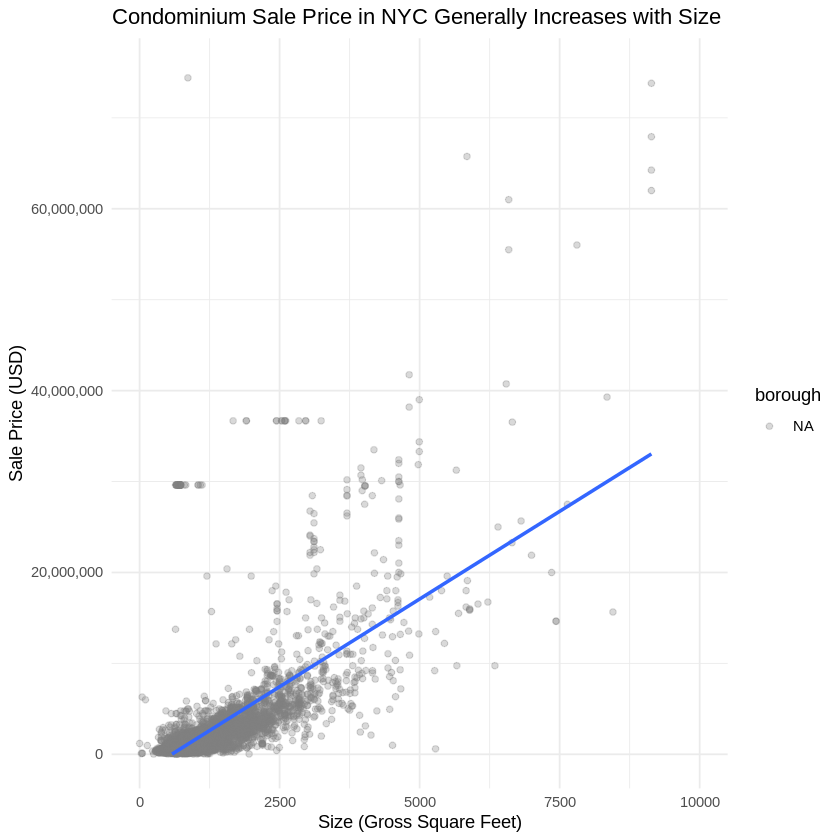

In [ ]:
# Plotting a scatter plot between goss_square_feet and sale_price
ggplot(data = NYC_condos,
       aes(x = gross_square_feet, y = sale_price)) +
  geom_point(aes(color = borough), alpha = 0.3) +
  scale_y_continuous(labels = scales::comma, limits = c(0, 75000000)) +
  xlim(0, 10000) +
  geom_smooth(method = "lm", se = FALSE) +
  theme_minimal() +
  labs(title = "Condominium Sale Price in NYC Generally Increases with Size",
       x = "Size (Gross Square Feet)",
       y = "Sale Price (USD)")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 153 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 153 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_smooth()`).”


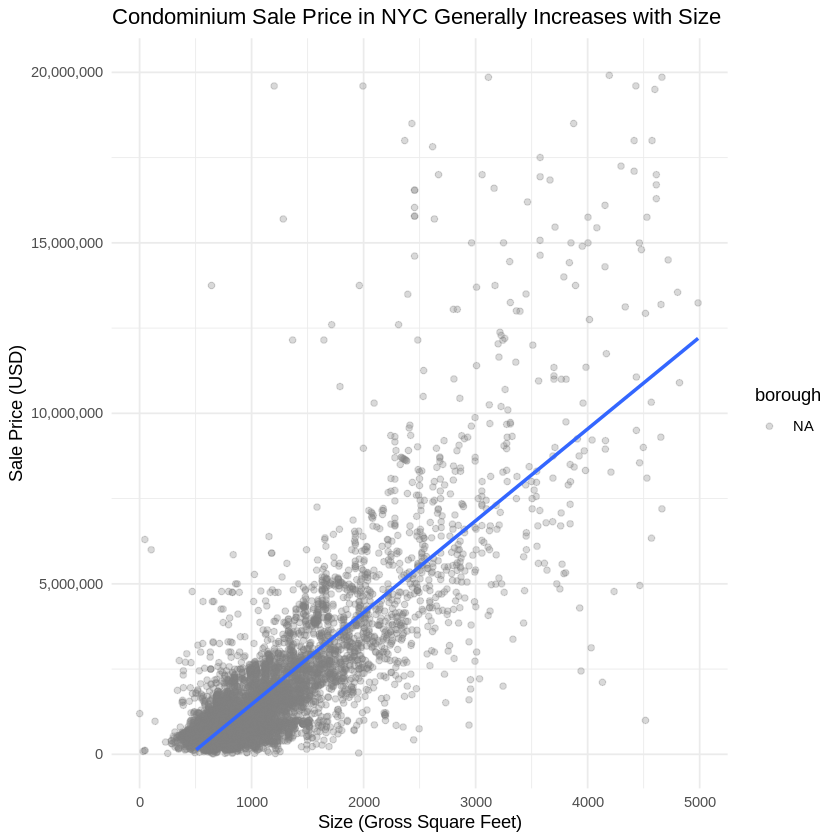

In [ ]:
# Applying different x-axis and y-axis limits to zoom in further
ggplot(data = NYC_condos,
       aes(x = gross_square_feet, y = sale_price)) +
  geom_point(aes(color = borough), alpha = 0.3) +
  scale_y_continuous(labels = scales::comma, limits = c(0, 20000000)) +
  xlim(0, 5000) +
  geom_smooth(method = "lm", se = FALSE) +
  theme_minimal() +
  labs(title = "Condominium Sale Price in NYC Generally Increases with Size",
       x = "Size (Gross Square Feet)",
       y = "Sale Price (USD)")

`geom_smooth()` using formula = 'y ~ x'


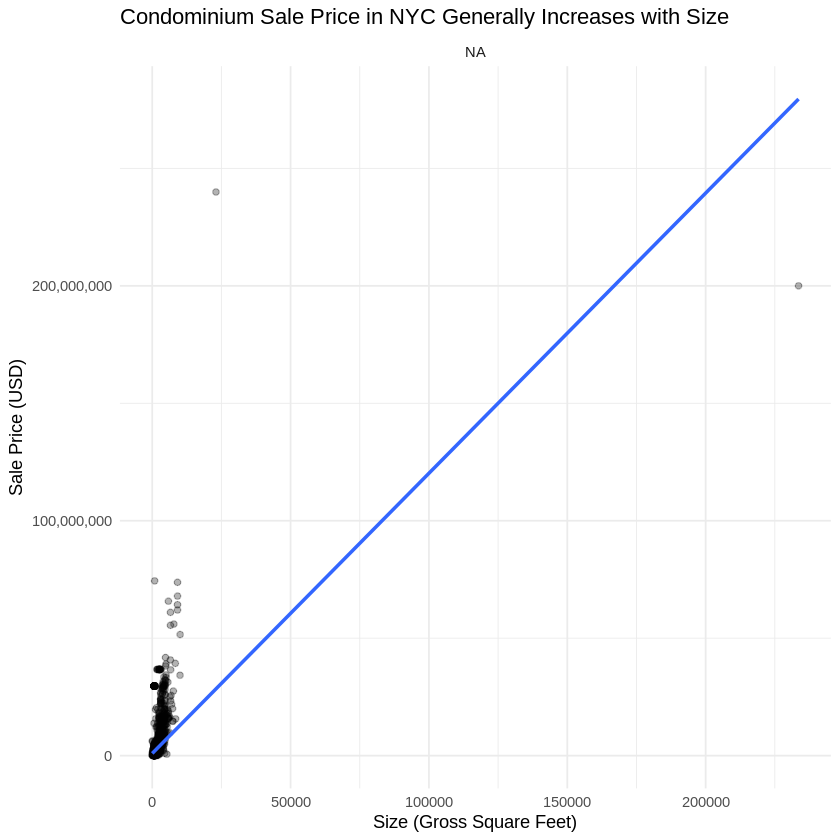

In [ ]:
#To better visualize the spread of data for each borough, we use y-axis and x-axis scales that are specific to each borough.
ggplot(data = NYC_condos,
       aes(x = gross_square_feet, y = sale_price)) +
  geom_point(alpha = 0.3) +
  facet_wrap(~ borough, scales = "free", ncol = 2) +
  scale_y_continuous(labels = scales::comma) +
  geom_smooth(method = "lm", se = FALSE) +
  theme_minimal() +
  labs(title = "Condominium Sale Price in NYC Generally Increases with Size",
       x = "Size (Gross Square Feet)",
       y = "Sale Price (USD)")

In [ ]:
# Make copy of dataframe before removing any sale records
NYC_condos_original <- NYC_condos

In [ ]:
# Generating a dataframe of multi-unit sales
multi_unit_sales <- NYC_condos %>%
  group_by(sale_price, sale_date) %>%
  filter(n() >= 3) %>%
  arrange(desc(sale_price))

In [ ]:
# Removing multi-unit sales
NYC_condos <- NYC_condos %>%
  group_by(sale_price, sale_date) %>%
  filter(n() <= 2) %>%
  ungroup()

A bivariate linear regression of `sale_price` (price) explained by `gross_square_feet` (size) was performed on two different datasets containing condominium sale records for New York City. One dataset, `NYC_condos`, was cleaned to remove multi-unit sale records (where the same sale price is recorded for many units). The other dataset, `NYC_condos_original`, remained unaltered and contained all original sale records. In each case, the hypothesis is that  there is a relationship between the size of a condominium (`gross_square_feet`) and the price (`sale_price`). We can declare there is a relationship between condominium size and price when the slope is sufficiently far from zero.

Below is the updated scatterplot that uses the cleaned `NYC_condos` data. For the Brooklyn borough we are better able to see the spread of the data and how the trend line fits the data because we removed the \$30 million outliers. The same is true for the Manhattan borough because the $200 million multi-unit sale was removed.


`geom_smooth()` using formula = 'y ~ x'


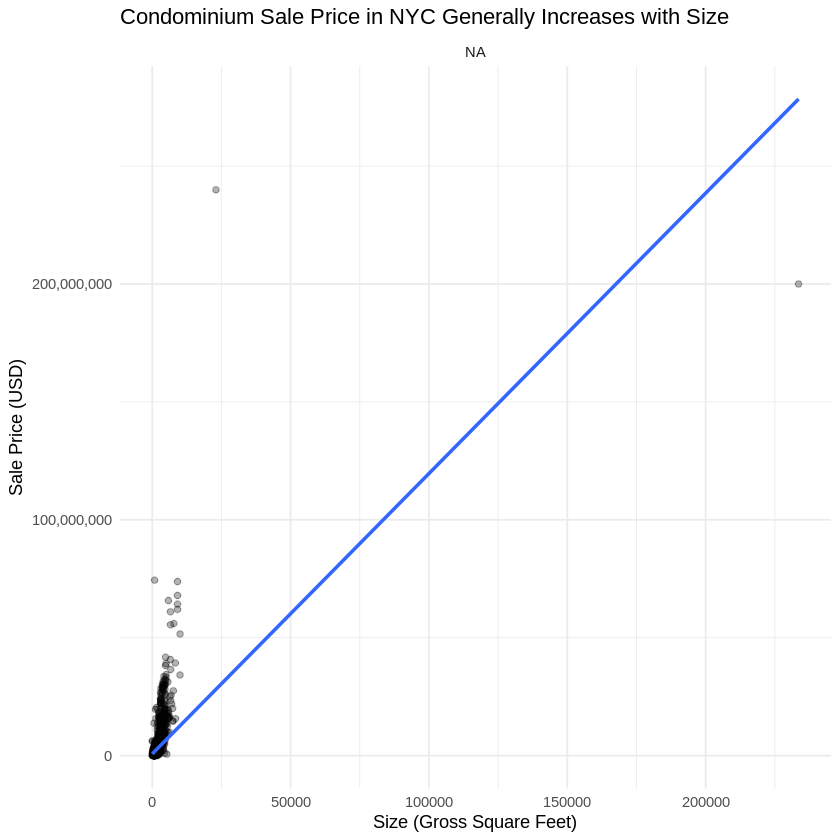

In [ ]:
ggplot(data = NYC_condos,
       aes(x = gross_square_feet, y = sale_price)) +
  geom_point(alpha = 0.3) +
  facet_wrap(~ borough, scales = "free", ncol = 2) +
  scale_y_continuous(labels = scales::comma) +
  geom_smooth(method = "lm", se = FALSE) +
  theme_minimal() +
  labs(title = "Condominium Sale Price in NYC Generally Increases with Size",
       x = "Size (Gross Square Feet)",
       y = "Sale Price (USD)")

In [ ]:
# Nesting the dataframe by borough
NYC_nested <- NYC_condos %>%
  group_by(borough) %>%
  nest()
print(NYC_nested)

# A tibble: 1 × 2
# Groups:   borough [1]
  borough data                 
  <chr>   <list>               
1 NA      <tibble [7,947 × 19]>


In [ ]:
# Step 2: fit linear models to each borough, individually
NYC_coefficients <- NYC_condos %>%
  group_by(borough) %>%
  nest() %>%
  mutate(linear_model = map(.x = data,
                            .f = ~lm(sale_price ~ gross_square_feet,
                                     data = .)))

In [ ]:
# Verify model results for Manhattan
summary(NYC_coefficients$linear_model[[1]])


Call:
lm(formula = sale_price ~ gross_square_feet, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-78411004  -1011755   -665043    -79777 211841334 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       740723.90   50489.48   14.67   <2e-16 ***
gross_square_feet   1188.77      16.87   70.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4117000 on 7945 degrees of freedom
Multiple R-squared:  0.3846,	Adjusted R-squared:  0.3845 
F-statistic:  4965 on 1 and 7945 DF,  p-value: < 2.2e-16


In [ ]:
# Step 3: generate a tidy dataframe of coefficient estimates that includes confidence intervals
NYC_coefficients <- NYC_condos %>%
  group_by(borough) %>%
  nest() %>%
  mutate(linear_model = map(.x = data,
                            .f = ~lm(sale_price ~ gross_square_feet,
                                     data = .))) %>%
  mutate(tidy_coefficients = map(.x = linear_model,
                                 .f = tidy,
                                 conf.int = TRUE))
NYC_coefficients

ERROR while rich displaying an object: Error in as.data.frame.default(x[[i]], optional = TRUE, stringsAsFactors = stringsAsFactors): cannot coerce class ‘"lm"’ to a data.frame

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. r

In [ ]:
# Step 4: Unnest to a tidy dataframe of coefficient estimates
NYC_coefficients_tidy <- NYC_coefficients %>%
  select(borough, tidy_coefficients) %>%
  unnest(cols = tidy_coefficients)
print(NYC_coefficients_tidy)

# A tibble: 2 × 8
# Groups:   borough [1]
  borough term          estimate std.error statistic  p.value conf.low conf.high
  <chr>   <chr>            <dbl>     <dbl>     <dbl>    <dbl>    <dbl>     <dbl>
1 NA      (Intercept)    740724.   50489.       14.7 4.20e-48  641751.   839697.
2 NA      gross_square…    1189.      16.9      70.5 0           1156.     1222.


In [ ]:
# Generate a tidy dataframe of regression summary statistics
NYC_summary_stats <- NYC_condos %>%
  group_by(borough) %>%
  nest() %>%
  mutate(linear_model = map(.x = data,
                            .f = ~lm(sale_price ~ gross_square_feet,
                                     data = .))) %>%
  mutate(tidy_summary_stats = map(.x = linear_model,
                                  .f = glance))
print(NYC_summary_stats)

# A tibble: 1 × 4
# Groups:   borough [1]
  borough data                  linear_model tidy_summary_stats
  <chr>   <list>                <list>       <list>            
1 NA      <tibble [7,947 × 19]> <lm>         <tibble [1 × 12]> 


In [ ]:
# Unnest to a tidy dataframe of
NYC_summary_stats_tidy <- NYC_summary_stats %>%
  select(borough, tidy_summary_stats) %>%
  unnest(cols = tidy_summary_stats) %>%
  arrange(r.squared)
print(NYC_summary_stats_tidy)

# A tibble: 1 × 13
# Groups:   borough [1]
  borough r.squared adj.r.squared   sigma statistic p.value    df  logLik    AIC
  <chr>       <dbl>         <dbl>   <dbl>     <dbl>   <dbl> <dbl>   <dbl>  <dbl>
1 NA          0.385         0.385  4.12e6     4965.       0     1 -1.32e5 2.65e5
# ℹ 4 more variables: BIC <dbl>, deviance <dbl>, df.residual <int>, nobs <int>


# Conclusion

Our analysis showed that, in general, the `gross_square_feet` variable is useful for explaining, or estimating, `sale_price` for condominiums in New York City. We observed that removing multi-unit sales from the dataset increased model accuracy. With linear models generated for New York City as a whole, and with linear models generated for each borough individually, we observed in all cases that the t-statistic was high enough, and the p-value was low enough, to declare that there is a relationship between `gross_square_feet` and `sale_price`.

In conclusion, We can notice a pattern in general as gross square feet increases sale price increases, we see this also holds up for land square feet (which is included in gross square feet as homes include the square footage of the house as well as land). Zooming in also shows that, for single family homes as the size increases so does the price. This trend also shows that as land size increases the sale price also increaes, for each borough we see that homes with larger gross square feet have higher sale prices.